In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv("covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.shape

(18110, 9)

In [5]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [6]:
data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
data[data.duplicated()]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [8]:
data.drop(columns=['Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)

In [9]:
data.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,Kerala,0,0,1
1,2,2020-01-31,Kerala,0,0,1
2,3,2020-02-01,Kerala,0,0,2
3,4,2020-02-02,Kerala,0,0,3
4,5,2020-02-03,Kerala,0,0,3


In [10]:
data['Date']=pd.to_datetime(data['Date'],format="%Y-%m-%d")

In [11]:
data['Date'].max()

Timestamp('2021-08-11 00:00:00')

In [12]:
data.rename(columns={'State/UnionTerritory':'State'},inplace=True)

In [14]:
data.head()

,Sno,Date,State,Cured,Deaths,Confirmed
0,1,2020-01-30,Kerala,0,0,1
1,2,2020-01-31,Kerala,0,0,1
2,3,2020-02-01,Kerala,0,0,2
3,4,2020-02-02,Kerala,0,0,3
4,5,2020-02-03,Kerala,0,0,3


In [15]:
data['Active']=data['Confirmed']-data['Deaths']-data['Cured']
data.head()

,Sno,Date,State,Cured,Deaths,Confirmed,Active
0,1,2020-01-30,Kerala,0,0,1,1
1,2,2020-01-31,Kerala,0,0,1,1
2,3,2020-02-01,Kerala,0,0,2,2
3,4,2020-02-02,Kerala,0,0,3,3
4,5,2020-02-03,Kerala,0,0,3,3


In [16]:
data.drop(columns=['Sno'],inplace=True)

In [18]:
data.columns

Index(['Date', 'State', 'Cured', 'Deaths', 'Confirmed', 'Active'], dtype='object')

In [19]:
indcases=data[data['Date']==data['Date'].max()].copy()

In [20]:
indcases

,Date,State,Cured,Deaths,Confirmed,Active
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548,7
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182,18882
18076,2021-08-11,Arunachal Pradesh,47821,248,50605,2536
18077,2021-08-11,Assam,559684,5420,576149,11045
18078,2021-08-11,Bihar,715352,9646,725279,281
18079,2021-08-11,Chandigarh,61150,811,61992,31
18080,2021-08-11,Chhattisgarh,988189,13544,1003356,1623
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654,4
18082,2021-08-11,Delhi,1411280,25068,1436852,504
18083,2021-08-11,Goa,167978,3164,172085,943


In [22]:
top_10_confirmed = indcases.sort_values(by="Confirmed",ascending=False).head(10)

In [23]:
print(type(top_10_confirmed))

<class 'pandas.core.frame.DataFrame'>


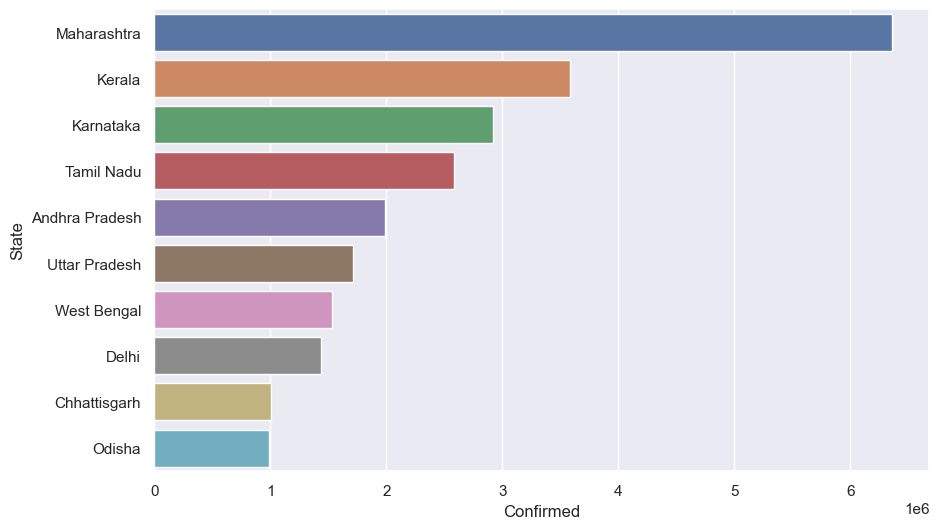

In [27]:
sns.barplot(x="Confirmed",y="State",data=top_10_confirmed)
sns.set(rc={'figure.figsize':(10,6)})

In [28]:
top_10_deaths = indcases.sort_values(by="Deaths",ascending=False).head(10)

<Axes: xlabel='Deaths', ylabel='State'>

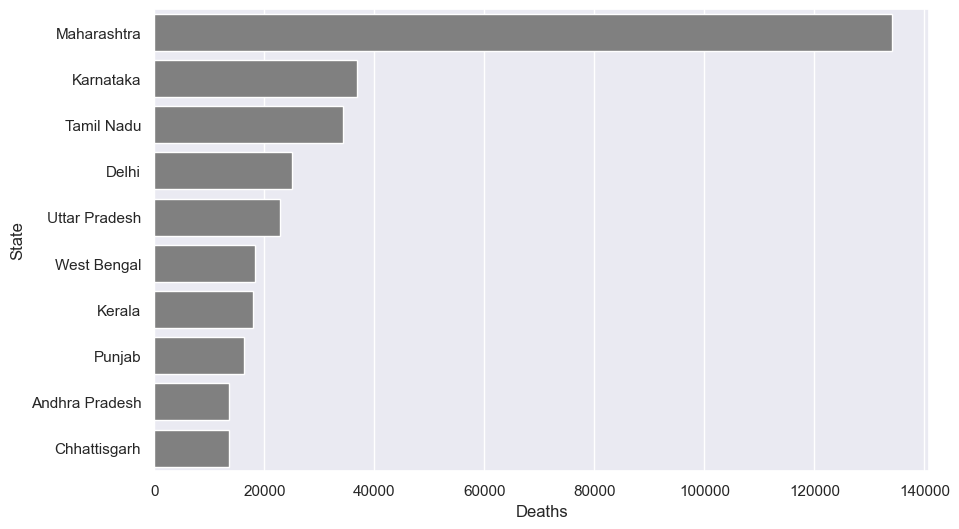

In [29]:
sns.barplot(data=top_10_deaths,x="Deaths",y="State",color="grey")